## Image Classification using model built in Tensorflow 

#### Using MNIST data to test the functionality of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('dataset/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
trX = train.drop('label',axis=1).values
trX = trX.reshape([-1,28,28])
trY = train['label'].values

In [5]:
trX.shape

(42000, 28, 28)

In [6]:
trY = pd.get_dummies(trY).values
trY.shape

(42000, 10)

#### The input images are of size (28x28) but the model expects input image size to be multiple of 8 so padding zeros at the border to make image size (32x32)

In [7]:
n_samples = trX.shape[0]
resized_image = []
for i in xrange(n_samples):
    img = trX[i]
    img = np.lib.pad(img, (2,2), 'constant', constant_values=(0))
    resized_image.append(img)

In [8]:
trX = np.array(resized_image).reshape([-1,32,32,1])

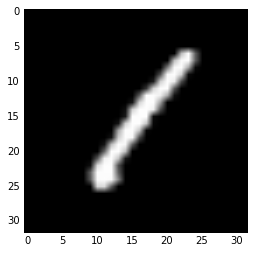

In [9]:
plt.imshow(trX[0].reshape(32,32),cmap='gray')

In [10]:
trX = trX/255.0

In [11]:
from sklearn.cross_validation import train_test_split
Xtrain,Xval,ytrain,yval = train_test_split(trX,trY,test_size=0.2)

In [12]:
from ImageClassifier import ConvolutionalClassifier
clf = ConvolutionalClassifier(n_classes=10,img_dims=trX[0].shape, ckpt_dir="./ckpt_dir", summary_dir="/tmp/convClf_logs")

In [14]:
clf.train(Xtrain,ytrain,n_iters=1000,batch_size=20,learning_rate=7e-4,keep_prob=0.5)

./ckpt_dir/model.ckpt-20000
Loss at step 20000: 0.509624
Loss at step 20010: 4.2246e-05
Loss at step 20020: 0.000754675
Loss at step 20030: 0.0260002
Loss at step 20040: 0.0170622
Loss at step 20050: 0.00208636
Loss at step 20060: 0.000142271
Loss at step 20070: 0.000115793
Loss at step 20080: 0.00250976
Loss at step 20090: 0.00662622
Loss at step 20100: 0.00360882
Loss at step 20110: 0.000148196
Loss at step 20120: 0.00690302
Loss at step 20130: 0.000279277
Loss at step 20140: 0.000843965
Loss at step 20150: 0.0294459
Loss at step 20160: 0.0052411
Loss at step 20170: 6.1989e-07
Loss at step 20180: 0.00964107
Loss at step 20190: 0.00235819
Loss at step 20200: 0.0283594
Loss at step 20210: 0.000704043
Loss at step 20220: 0.000153851
Loss at step 20230: 9.69392e-05
Loss at step 20240: 0.000454962
Loss at step 20250: 2.1039e-05
Loss at step 20260: 0.000540375
Loss at step 20270: 0.0327705
Loss at step 20280: 0.000794853
Loss at step 20290: 0.000482682
Loss at step 20300: 3.94708e-05
Loss 

In [15]:
# Accuracy and loss for training data
clf.score(Xtrain,ytrain)

[0.99029762, 0.032433558]

In [16]:
# Accuracy and loss for validation data
clf.score(Xval,yval)

[0.98440474, 0.058637373]

### Loss function and accuracy plots visualized using tensorboard with logdir=convClf_logs/